# HOUSE PRICE PREDICTION -- BENGALURU

      


##### TECH-A-INTERN - DataScience Intership project submitted by TELS MARIYA THOMAS ( in october 2023)

#### problem statement:
Humans are always in need for shelter. As a matter of time through the evolution of human race, housing became an identity to the wealth and status of a person in a community. Now a days,finding  the right home in right locality with the preferred budget is a task for common man. 

In this project iam trying to predict the house prices, based on the features of the house, area type and locality. 
     
For the project, i opted a real time dataset of house prices in Bengaluru, which is a highly populated metropolitan city in India. 
     

https://www.kaggle.com/datasets/abhinaykumarsingh/bengaluru-house-price-data


In [1]:
# importing the necessory libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

# LOAD AND READ THE DATASET 

In [2]:
# loading the dataset 
df_hs=pd.read_csv(r"D:\datasets kaggle\datasets_20710_26737_Bengaluru_House_Data.csv")
df_hs.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## INITIAL ANALYSIS OF THE DATA 

##### info about the dataset

In [3]:
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


From the info we have 3 numerical columns and 6 object columns 

##### desciption of the dataset

In [4]:
# description of the numerical variables 
df_hs.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
# description of the categorical variables 
df_hs.describe(include=object)

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


##### checking for null values 

In [7]:
df_hs.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Plots to understand the uncleaned data

### univariate analysis

In [8]:
df_num=df_hs.select_dtypes(exclude=object)
df_cat=df_hs.select_dtypes(include=object)

##### numerical variables

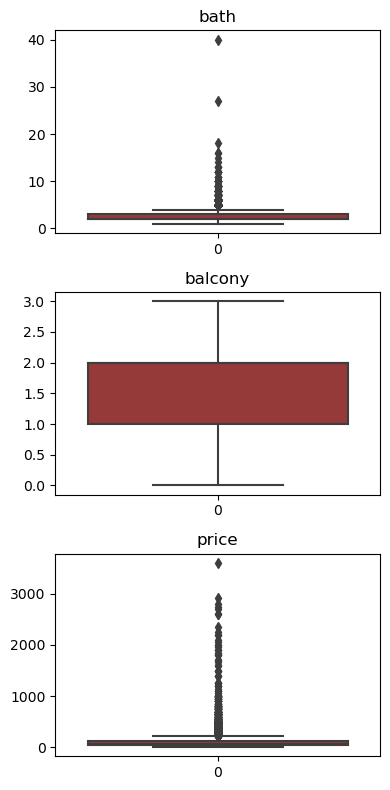

In [9]:
plt.figure(figsize=(4,8))
re=1
for i in df_num.columns:
    plt.subplot(3,1,re)
    sns.boxplot(df_hs[i], color='brown')
    plt.title(i)
    re+=1
    
plt.tight_layout()
plt.show()

Bath and price has so many outliers 

##### categorical variables

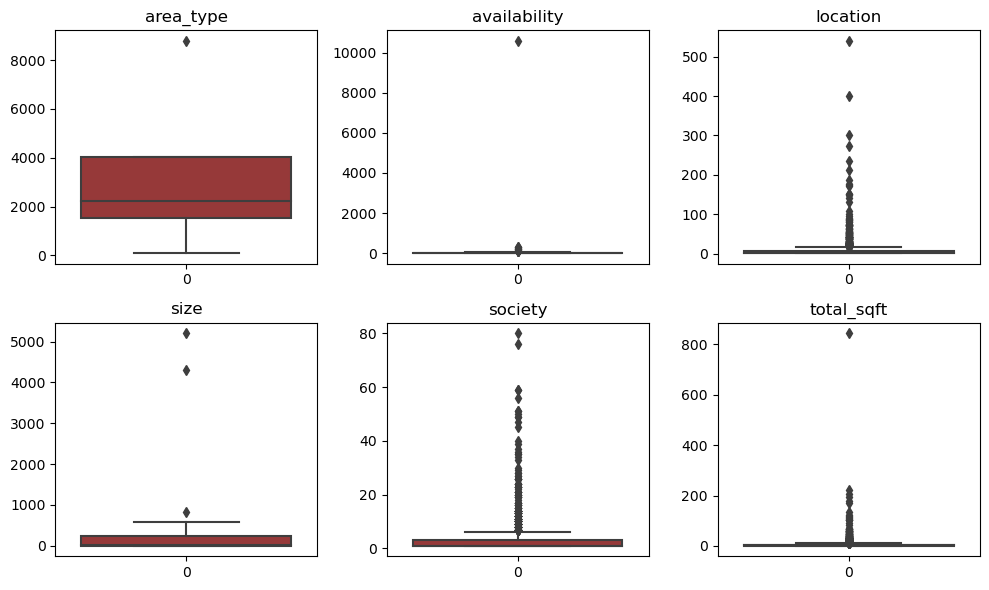

In [10]:
plt.figure(figsize=(10,6))
re=1
for i in df_cat.columns:
    plt.subplot(2,3,re)
    sns.boxplot(df_hs[i].value_counts(), color='brown')
    plt.title(i)
    re+=1
    
plt.tight_layout()
plt.show()

In [ ]:
All the categorical columns has extreme outliers 

# Bivariate analysis 

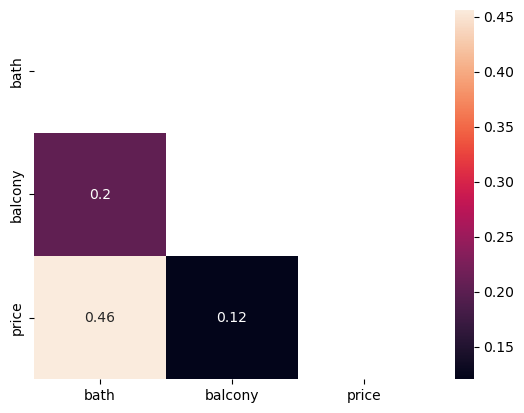

In [11]:
sns.heatmap(df_hs.corr(), annot=True, mask=np.triu(df_hs.corr()))
plt.show()

In [ ]:
heatmap shows moderate correlation between the numerical variables 

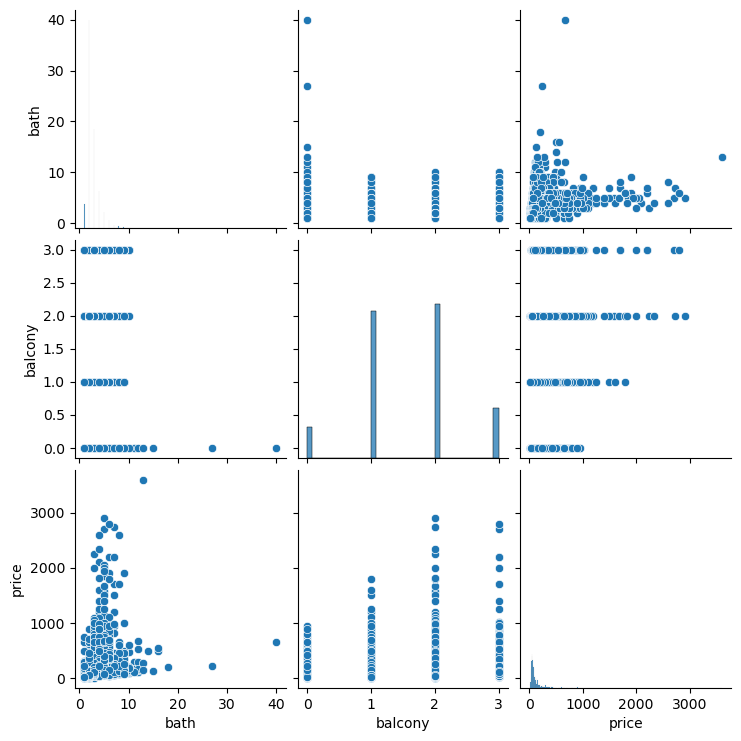

In [12]:
# plotting a pairplot
sns.pairplot(df_hs)
plt.show()

The pairplot doesnot show any direct linear relationship between the variables. 

# PREPROCESSING THE DATA

The given data attributes has to cleaned well. The following steps shows treating each attribute one by one.

# * TREATING COLUMNS 

## 1. TREATING THE TOTAL_SQFT COLUMN

TREATMENTS TO BE DONE:
    *The column is given as object but it is actually a numerical attribute. So it has to converted into numerical. 
    *The column has different units in it. Some are in square feet and some are in acres, square meters etc. everything has to be changed into square feet. 
    
    The following steps will shows the problems with the column i encountered and the changes that i have made. 

In [13]:
df=df_hs  # renamed the data 

#### checking for value_counts

In [14]:
# changing the datatype of sqrtfoot. 
# df_hs['total_sqft']=df_hs['total_sqft'].astype(float) 
# checking for unique values in total_sqft as  direct convertion didnot worked because some records has given in a range. 

df['total_sqft'].value_counts()

df['total_sqft'].unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

By checking the vakue counts i found that some records are given as in range. so we have to replace that records with its mean value. 


As the column has range of values for the squarefoot of some houses, iam going to split the attribute and take average of the value and save the average as the total squarefeet. 

#### creating a new dataframe by expanding the column

In [15]:
# expanding the total sqft column and saving as a new dataframe. 
sqft=df['total_sqft'].str.split(" - ", expand=True)

In [16]:
# checking how many column has a range of values in the dataframe 
sqft

,0,1
0,1056,None
1,2600,None
2,1440,None
3,1521,None
4,1200,None
...,...,...
13315,3453,None
13316,3600,None
13317,1141,None
13318,4689,None


In [17]:
# filling null values with zero. 
sqft.fillna(0,inplace=True)

In [18]:
# checking datatype. 
sqft.dtypes

0    object
1    object
dtype: object

The both columns are in object format. so i tried to convert the first column into numerical in order to perform the arithmetic operation on the columns. 

                 sqft.iloc[:,0].astype(float)
                                      * convertion won't happen bcz we have a value called '34.46Sq. Meter'--- 
                                      
                # concluding there is a possibility to have different units in this columns with texts. 
                # we have to find those units first and then we have to convert all into sqft 


#### Identifying records with both numerical and alphabetical characters

In [19]:
# Identify records with both numerical and alphabetical characters
records_with_units = sqft[sqft.iloc[:,0].apply(lambda x: any(c.isalpha() for c in x)\
                                                       and any(c.isdigit() for c in x))]

records_with_units

,0,1
410,34.46Sq. Meter,0
648,4125Perch,0
775,1000Sq. Meter,0
872,1100Sq. Yards,0
1019,5.31Acres,0
1086,30Acres,0
1400,716Sq. Meter,0
1712,1500Sq. Meter,0
1743,142.61Sq. Meter,0
1821,1574Sq. Yards,0


So we have text units along with umericals in the first column. The text data present in these column are:
            1. Sq. Meter
            2.Perch	
            3.Sq. Yards
            4.Acres
            5.Cents	
            6.Guntha	
            7.Grounds	
            
            
iam going to use regular expressions to get the numberic values and then iam converting it into squarefeet. 
For that let me define a function which can convert all the numerical values . 

In [21]:
import re

#### converting all records in 1 column of sqft into sqft using a defined function

In [22]:
def convert_to_sqft(value):
    # Check if the value contains 'Sq. Meter' or 'Sq. Mtr'
    if re.search(r'Sq\. Meter|Sq\. Mtr', value):
        # Extract numeric part and convert to float
        numeric_value = float(re.findall(r'\d+\.\d+|\d+', value)[0])
        # Convert square meters to square feet (1 sq.mtr = 10.7639 sq.ft)
        sqft_value = numeric_value * 10.7639
        return sqft_value
    elif re.search(r'Perch', value):
        numeric_value = float(re.findall(r'\d+\.\d+|\d+', value)[0])  
        sqft_value = numeric_value * 272.25   # 1 Perch = 272.25 Sq. Feet
        return sqft_value
    elif re.search(r'Sq. Yards', value):
        numeric_value = float(re.findall(r'\d+\.\d+|\d+', value)[0])  
        sqft_value = numeric_value * 9      # 1 Sq. Yard = 9 Sq. Feet
        return sqft_value
    elif re.search(r'Acres', value):
        numeric_value = float(re.findall(r'\d+\.\d+|\d+', value)[0])  
        sqft_value = numeric_value * 43560      # 1 Acre = 43560 Sq. Feet
        return sqft_value
    elif re.search(r'Cents', value):
        numeric_value = float(re.findall(r'\d+\.\d+|\d+', value)[0])  
        sqft_value = numeric_value *  435.6       # 1 Cent = 435.6 Sq. Feet
        return sqft_value
    elif re.search(r'Guntha', value):
        numeric_value = float(re.findall(r'\d+\.\d+|\d+', value)[0])  
        sqft_value = numeric_value *  435.6       # 1 Cent = 435.6 Sq. Feet
        return sqft_value
    elif re.search(r'Grounds', value):
        numeric_value = float(re.findall(r'\d+\.\d+|\d+', value)[0])  
        sqft_value = numeric_value *  2400                # 1 Ground = 2400 Sq. Feet
        return sqft_value
    else:
        # For values in square feet, keep them as they are
        return float(re.findall(r'\d+\.\d+|\d+', value)[0])


In [23]:
# applying the function to the first column of sqft and storing it as area 
sqft['area'] = sqft.iloc[:,0].apply(convert_to_sqft)

# succesfully converted all records units into sqft. 

In [24]:
sqft.head()

,0,1,area
0,1056,0,1056.0
1,2600,0,2600.0
2,1440,0,1440.0
3,1521,0,1521.0
4,1200,0,1200.0


##### converting the second column into float

In [25]:
sqft.iloc[:,1]=sqft.iloc[:,1].astype(float)

In [26]:
sqft.dtypes

0        object
1       float64
area    float64
dtype: object

#### coverting the total_sqft  column in df by taking average of column 2 and 3 in sqft. 

In [27]:
df['total_sqft']=(sqft.iloc[:,1]+sqft.iloc[:,2])/2

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


successfully converted the column squarefeet into float. 

## 2. TREATING THE SIZE COLUMN

In [29]:
# checking for unique values 
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [30]:
# checking for value counts 
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

The data has 3 bedroom, and 3bhk houses which are actually same. both has 3 bedrooms. so iam going to drop the bhk and bedrrom from the column to keep the column having numericals only. (not changing dtype of the column)

In [31]:
# creating a new column called bhk -- meaning no of bed rooms in the house. 
df['BHK']=df['size'].str.split(' ', expand=True)[0]

In [32]:
df['BHK'].value_counts()

2     5528
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: BHK, dtype: int64

The new column clearly shows that when the bedrOoms are higher then 10 it act as an outlier in the column.

In [33]:
# Drop size column, not needed anymore. 
df.drop('size', axis=1, inplace=True)

In [34]:
# value counts of all BHK with 10 or more are below 10. so these records in df can be replaced  with morethan10 
value_counts=df['BHK'].value_counts()
values_to_replace = value_counts[value_counts<10].index.tolist()
df['BHK'] = df['BHK'].replace(values_to_replace, 'morethan10')

In [35]:
# value counts of all BHK between 7 and 10 are between 10 and 100. so these records in df can be replaced  with 7 to 10. 

values_to_replace = value_counts[(value_counts>=10 ) & (value_counts<=100) ].index.tolist()
df['BHK'] = df['BHK'].replace(values_to_replace, '7 to 10 ')


In [36]:
# value counts of all BHK between '5 or 6 ' are between 100 and 400. so these records in df can be replaced  with 5 or 6 

values_to_replace = value_counts[(value_counts>100 ) & (value_counts<400) ].index.tolist()
df['BHK'] = df['BHK'].replace(values_to_replace, '5 or 6 ')

In [37]:
#checking for value counts again 
df['BHK'].value_counts()


2             5528
3             4857
4             1417
1              656
5 or 6         577
7 to 10        257
morethan10      12
Name: BHK, dtype: int64

## 3. TREATING THE AVAILABILTY COLUMN

In [38]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [39]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

Here we have more than 10000 properties which are ready to move and others specifies a date to move in. 

so iam going to replace all dates availability with upcoming to reduce the categories. 

In [40]:
# replacing all dated records with upcoming 
df['dates'] = np.where(~df['availability'].isin(['Ready To Move', 'Immediate Possession']), 'upcoming', df['availability'])

In [41]:
# dropping the original
df.drop('availability', axis=1, inplace=True)

In [42]:
# recheking the valuecounts
df['dates'].value_counts()

Ready To Move           10581
upcoming                 2723
Immediate Possession       16
Name: dates, dtype: int64

## 4. TREATING LOCATION COLUMN

In [43]:
# checking for value counts 
value_counts=df['location'].value_counts()
value_counts

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

Here iam going to change the location name into others if the location is not repeated atleast 100.

In [44]:
# Identify values occurring less than 100 and replace it with other
values_to_replace = value_counts[value_counts <=100].index.tolist()

df['location'] = df['location'].replace(values_to_replace, 'Other')


In [45]:
# recheking value_counts
df['location'].value_counts()

Other                       9815
Whitefield                   540
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
Yelahanka                    213
Uttarahalli                  186
Hebbal                       177
Marathahalli                 175
Raja Rajeshwari Nagar        171
Hennur Road                  152
Bannerghatta Road            152
7th Phase JP Nagar           149
Haralur Road                 142
Electronic City Phase II     132
Rajaji Nagar                 107
Name: location, dtype: int64

## 5. TREATING SOCIETY COLUMN

Society has a number of names only repeating once. iam going to keep only the names repeated atleast 50 times. renaming all other into other category

In [46]:
#taking value counts, if value counts less than 50 replace the recors with other
value_counts=df['society'].value_counts()
values_to_replace = value_counts[value_counts <=50].index.tolist()
df['society'] = df['society'].replace(values_to_replace, 'Other')

In [47]:
# recheking the value counts
df['society'].value_counts()

Other      7386
GrrvaGr      80
PrarePa      76
Sryalan      59
Prtates      59
GMown E      56
Bhmesy       51
Prtanha      51
Name: society, dtype: int64

# * TREATING MISSING VALUES 

In [48]:
#Checking for missing values 
df.isnull().sum()

area_type        0
location         1
society       5502
total_sqft       0
bath            73
balcony        609
price            0
BHK             16
dates            0
dtype: int64

#### location

In [49]:
df[df['location'].isnull()]

,area_type,location,society,total_sqft,bath,balcony,price,BHK,dates
568,Super built-up Area,NaN,Other,800.0,3.0,2.0,86.0,3,Ready To Move


In [50]:
# filling with other
df['location'] = df['location'].fillna('other')

The missing value in location can be filled with other. 

#### society

In [51]:
# on the asumption that the house is not in any of the societies, iam going to fill it is No. 
df['society']=df['society'].fillna('No')

#### bath , balcony and bhk 

In [52]:
df.isnull().sum()

area_type       0
location        0
society         0
total_sqft      0
bath           73
balcony       609
price           0
BHK            16
dates           0
dtype: int64

The null values in bath are going to be imputed with the average value of bath, considering the bhk of the house, 

In [53]:
# imputing mean of the bath size to the bath grouping on BHK values 
df['bath'] = df['bath'].fillna(df.groupby('BHK')['bath'].transform('mean'))

In [54]:
# rounding the imputted values to whole numbers
df['bath']=round(df['bath'],0)

In [55]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., nan, 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [56]:
# imputing mean of the balcony size to the balcony grouping on BHK values 
df['balcony'] = df['balcony'].fillna(df.groupby('BHK')['balcony'].transform('mean'))

In [57]:
# rounding the imputted values to whole numbers
df['balcony']=round(df['balcony'],0)

In [58]:
df['balcony'].unique()

array([ 1.,  3.,  2.,  0., nan])

In [59]:
df[df['balcony'].isnull()]

,area_type,location,society,total_sqft,bath,balcony,price,BHK,dates
579,Plot Area,Sarjapur Road,Other,1800.0,NaN,NaN,34.185,NaN,Immediate Possession
1775,Plot Area,Other,Other,3817.0,NaN,NaN,124.000,NaN,Immediate Possession
2264,Plot Area,Other,No,1200.0,NaN,NaN,460.000,NaN,Immediate Possession
2809,Plot Area,Sarjapur Road,Other,1800.0,NaN,NaN,28.785,NaN,Immediate Possession
2862,Plot Area,Other,Other,1950.0,NaN,NaN,46.800,NaN,Immediate Possession
5333,Plot Area,Other,Other,3752.5,NaN,NaN,177.115,NaN,Immediate Possession
6423,Plot Area,Whitefield,Other,1162.0,NaN,NaN,26.730,NaN,Immediate Possession
6636,Plot Area,Other,Other,750.0,NaN,NaN,25.490,NaN,Immediate Possession
6719,Plot Area,Other,Other,1730.0,NaN,NaN,28.545,NaN,Immediate Possession
7680,Plot Area,Other,No,2500.0,NaN,NaN,400.000,NaN,Immediate Possession


iam dropping these 16 records as they wont be much contributing to the analysis. 
To predict the BHK, BATH number and BALCONY USING THE ONLY VARIABLE AREA SEEMS A BAD IDEA. 

In [60]:
# dropping the columns which are null in all 3 attributes and saving the data into new data
df1=df[~((df['bath'].isnull()) & (df['balcony'].isnull()) & (df['BHK'].isnull()))]

In [61]:
df1.isnull().sum()

area_type     0
location      0
society       0
total_sqft    0
bath          0
balcony       0
price         0
BHK           0
dates         0
dtype: int64

 no null values remaining. 

#  *Visualization of the cleaned data 

In [62]:
df1_cat=df1.select_dtypes(include=object)
df1_num=df1.select_dtypes(exclude=object)

#### numerical columns

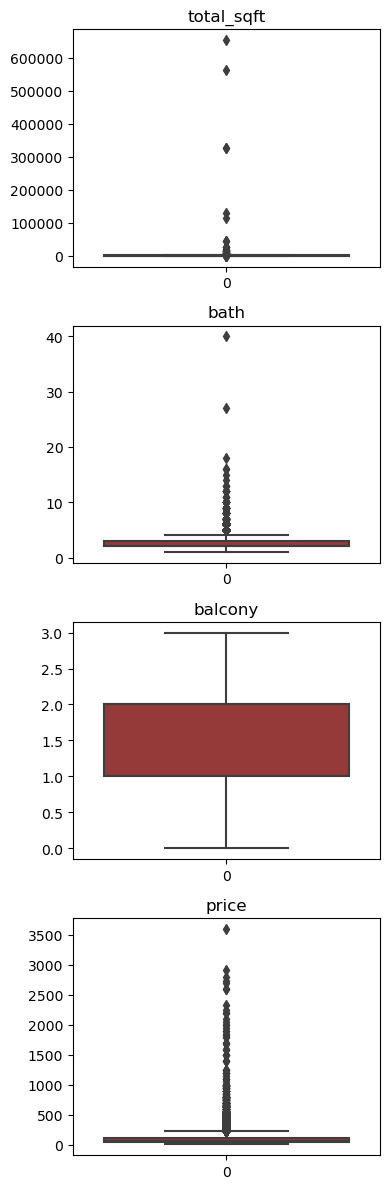

In [63]:
plt.figure(figsize=(4,12))
re=1
for i in df1_num.columns:
    plt.subplot(4,1,re)
    sns.boxplot(df1[i], color='brown')
    plt.title(i)
    re+=1
    
plt.tight_layout()
plt.show() 

outliers exists in all columns 

#### categorical columns

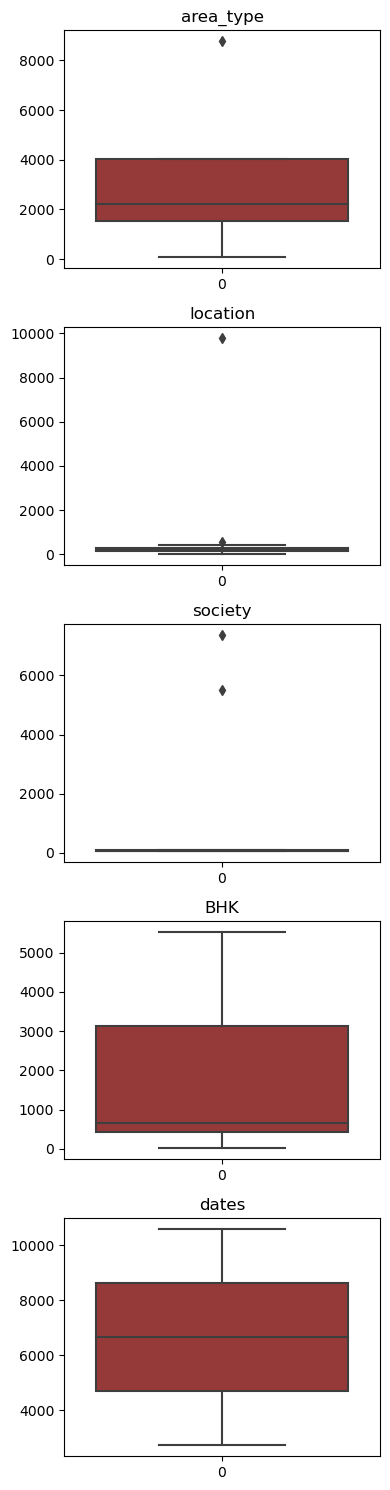

In [66]:
plt.figure(figsize=(4,15))
re=1
for i in df1_cat.columns:
    plt.subplot(5,1,re)
    sns.boxplot(df1[i].value_counts(), color='brown')
    plt.title(i)
    re+=1
    
plt.tight_layout()
plt.show()

In [67]:
df1.columns

Index(['area_type', 'location', 'society', 'total_sqft', 'bath', 'balcony',
       'price', 'BHK', 'dates'],
      dtype='object')

### area_type 

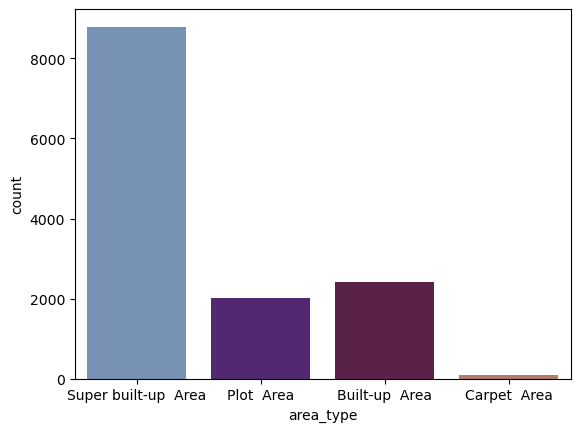

In [68]:
sns.countplot(x='area_type',data=df1, palette='twilight' )
plt.show()

super built up area has the highest number of houses present.

### dates

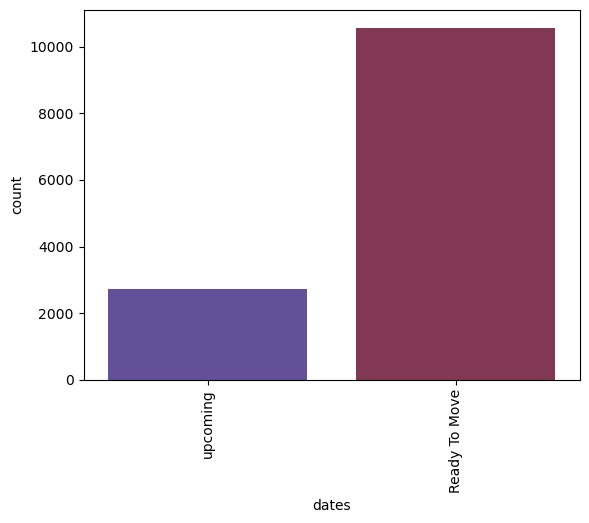

In [69]:
sns.countplot(x='dates',data=df1 , palette='twilight')
plt.xticks(rotation=90)
plt.show()

ready to move houses are high in number


### society 

In [86]:
# checking for value counts 
df1['society'].value_counts()  

Other      7373
No         5499
GrrvaGr      80
PrarePa      76
Sryalan      59
Prtates      59
GMown E      56
Bhmesy       51
Prtanha      51
Name: society, dtype: int64

As the value counts of the other society is high( other include more than 100 separate societies), iam plotting the graph ignoring number of houses present in other society to know exactly which locations counts is the highest. 

In [88]:
b=df1[~(df1['society']=='Other')]

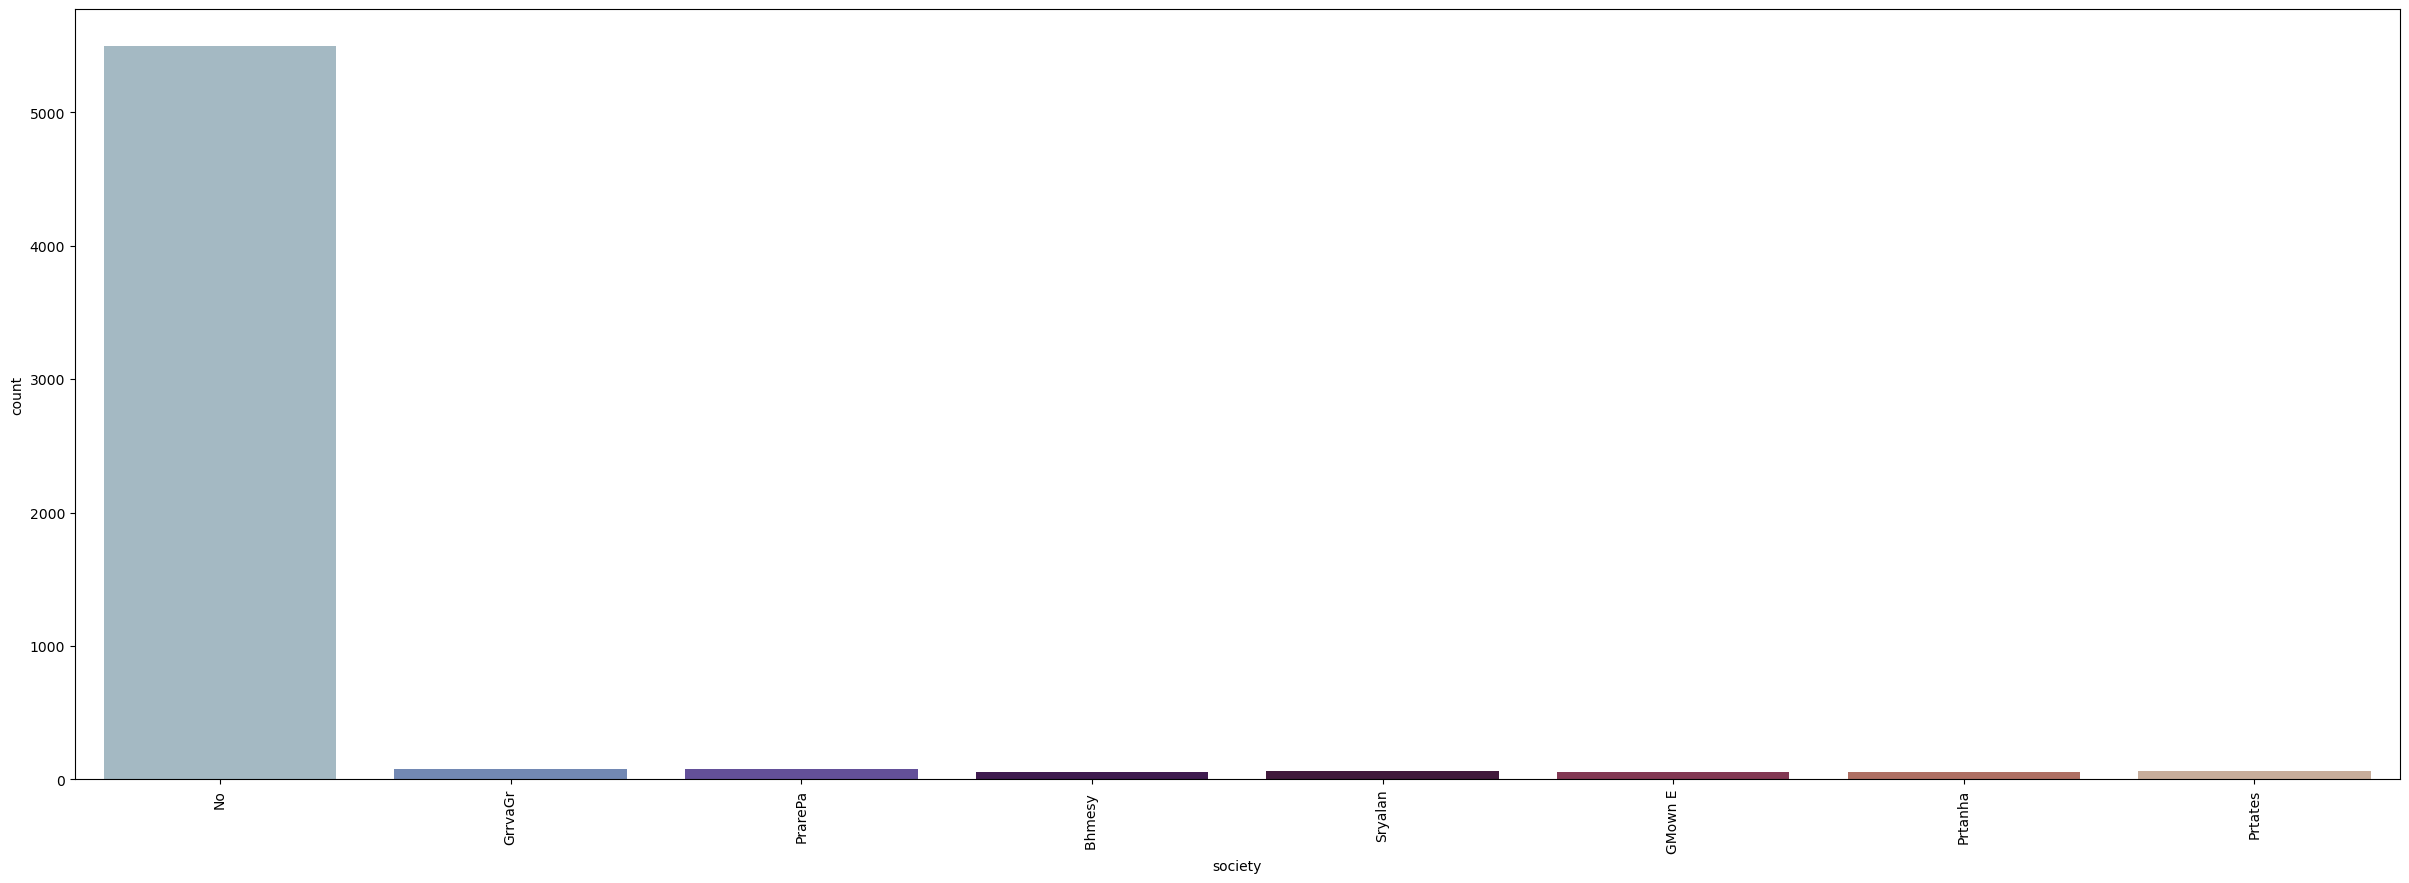

In [93]:
plt.figure(figsize=(30,10))
sns.countplot(x='society', data=b , palette='twilight');
plt.xticks(rotation=90)
plt.show()

The houses that doesnt belong to any socity are high.

### location

In [94]:
df1['location'].value_counts()

Other                       9803
Whitefield                   539
Sarjapur  Road               397
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
Yelahanka                    212
Uttarahalli                  186
Hebbal                       177
Marathahalli                 175
Raja Rajeshwari Nagar        171
Hennur Road                  152
Bannerghatta Road            152
7th Phase JP Nagar           149
Haralur Road                 142
Electronic City Phase II     132
Rajaji Nagar                 107
other                          1
Name: location, dtype: int64

As the value counts of the other location is high( other include more than 100 locations), iam plotting the graph ignoring number of houses present in other location to know exactly which locations counts is the highest. 

In [95]:
b=df1[~(df1['location']=='Other')]

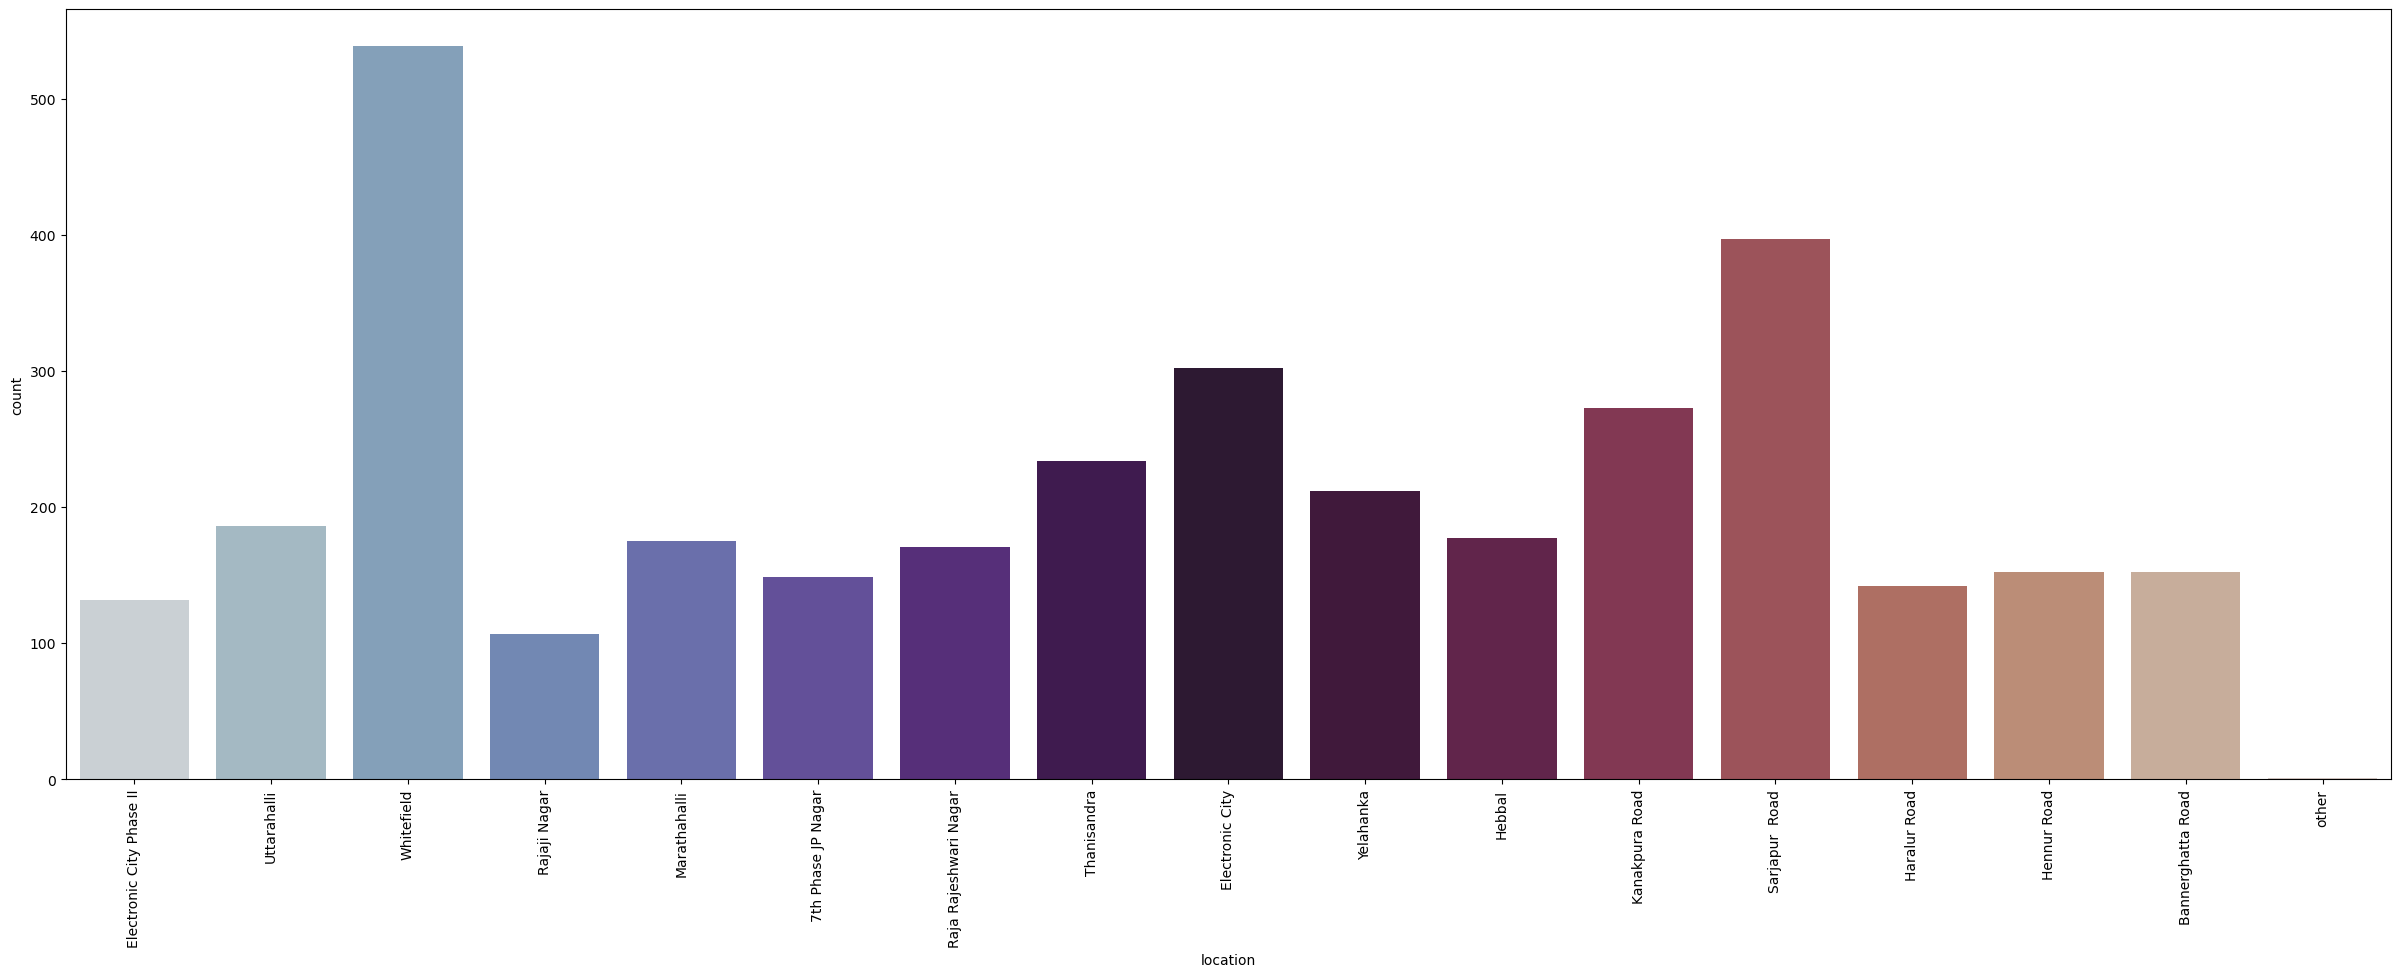

In [97]:
plt.figure(figsize=(30,10))
sns.countplot(x='location',data=b, palette='twilight' )
plt.xticks(rotation=90)
plt.show()

large number of houses are avilable in whitefield, followed by Sarjapur road

### BHK

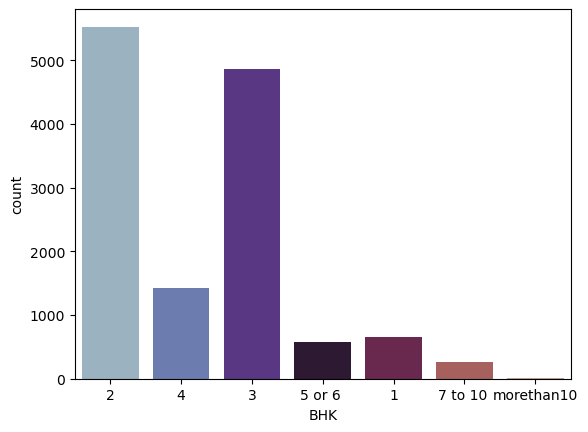

In [98]:
sns.countplot(x='BHK',data=df1, palette='twilight' )
plt.show()

In [ ]:
2BHK has the highest count followed by 3BHK

## PRICE VS FEATURES 

## 1. price vs location

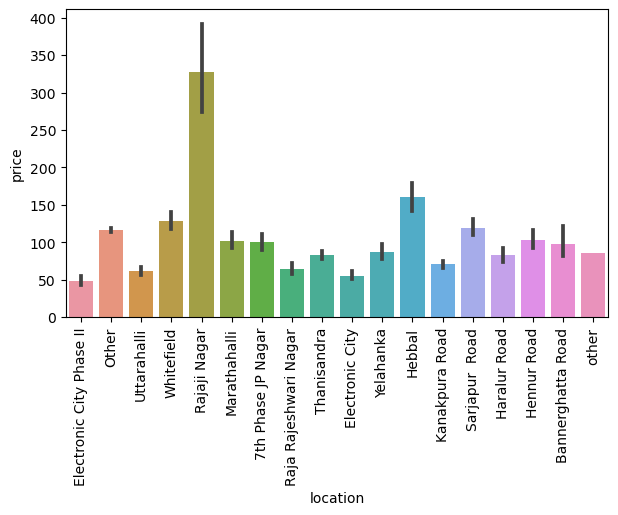

In [114]:
plt.figure(figsize=(7,4))
sns.barplot(y=df1['price'] ,x=df1['location'])
plt.xticks(rotation=90)
plt.show()

there is a high price variation in rajaji nagar. may presence of some some outliers. 

### 2. area_type vs price 

<Axes: xlabel='area_type', ylabel='price'>

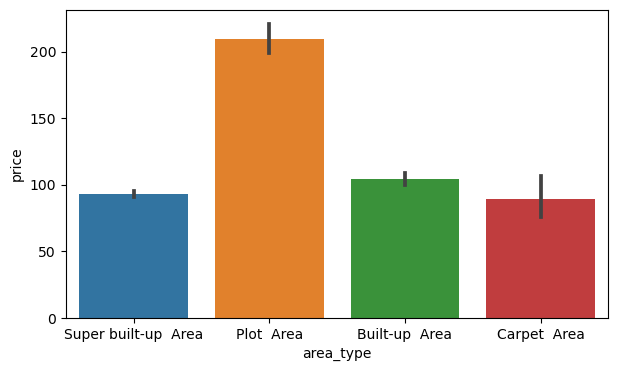

In [113]:
plt.figure(figsize=(7,4))
sns.barplot(x=df1['area_type'], y=df1['price'])

In [ ]:
The price of houses with plot area is high compared to others 

### 3. society vs price 

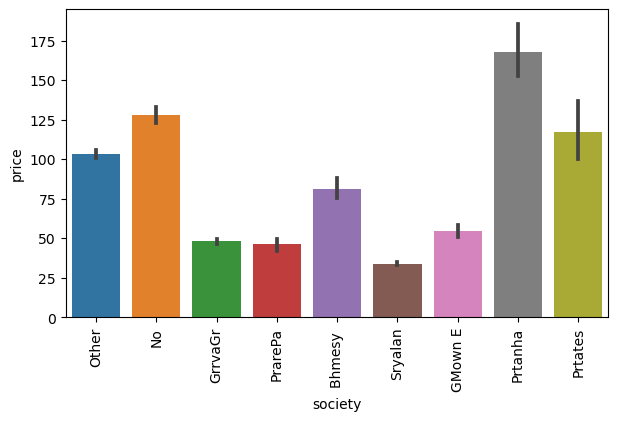

In [118]:
plt.figure(figsize=(7,4))
sns.barplot(x=df1['society'], y=df1['price'])
plt.xticks(rotation=90)
plt.show()

The average price of houses in prtanha society is the highest followed by houses doesnt belongs to any socity and prtates.  

### 4. BHK vs price 

<Axes: xlabel='BHK', ylabel='price'>

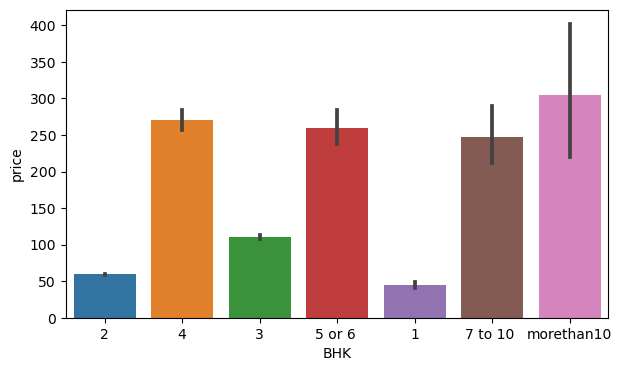

In [123]:
plt.figure(figsize=(7,4))
sns.barplot(x=df1['BHK'], y= df1['price'])

The price of houses with more than 10 bedrooms are high followed by bedrooms of 4 and so on. 

### 5. dates vs price 

<Axes: xlabel='dates', ylabel='price'>

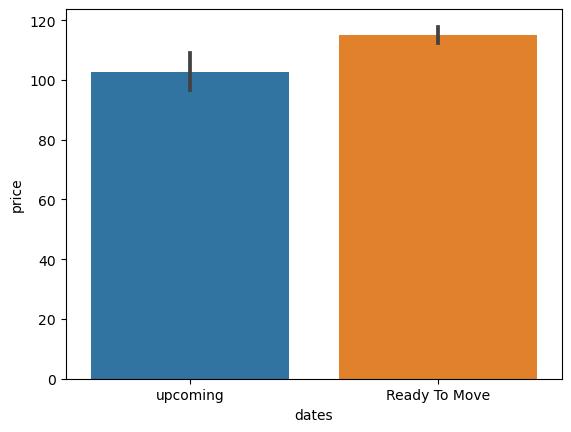

In [126]:
sns.barplot(x=df1['dates'], y=df1['price'])

The average price of ready to move houses are high 

#  *TREATING OUTLIERS 

checking for outliers 

<Axes: >

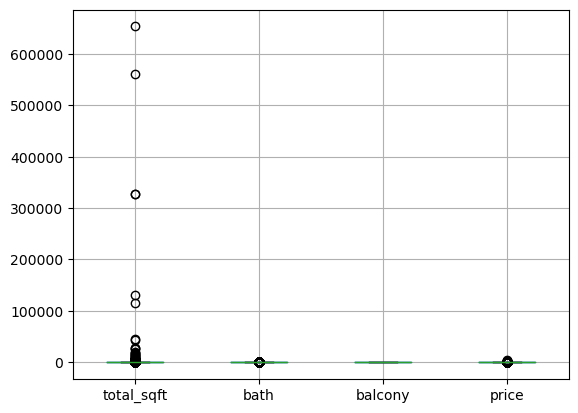

In [128]:
df1.boxplot()

total sqft has the highest number of outliers. it had records with 40  acres and 3 cents. so this column has extreme outliers 

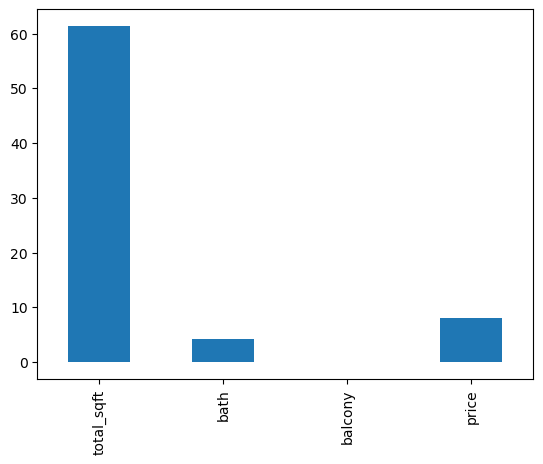

In [133]:
# checking for skeweness in th data
df1.skew().plot(kind='bar')
plt.show()

Total sqft is highly skewed. 

In [131]:
#finding quantiles and iqr and then fixing the whisker length to 1.25 ( to remove all extreme outliers)
# saving the outlier removed data into a new data called df2


q1=df1.quantile(0.25)
q3=df1.quantile(0.75)


iqr=q3-q1


ul=q3+((1.25)*(iqr))
ll=q1-((1.25)*(iqr))

df2=df1[~((df1<ll) |  (df1>ul)).any(axis=1)]

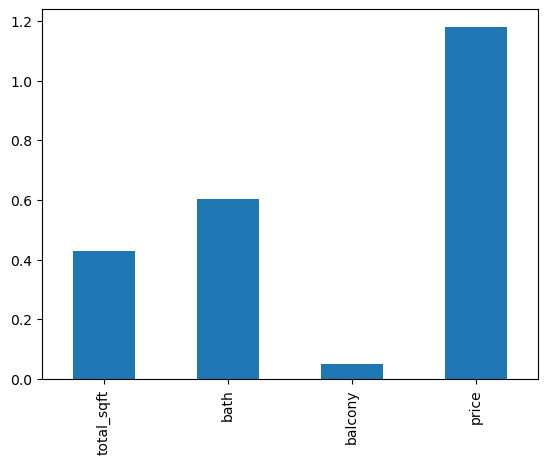

In [132]:
# checking for the skewness again 
df2.skew().plot(kind='bar')
plt.show()

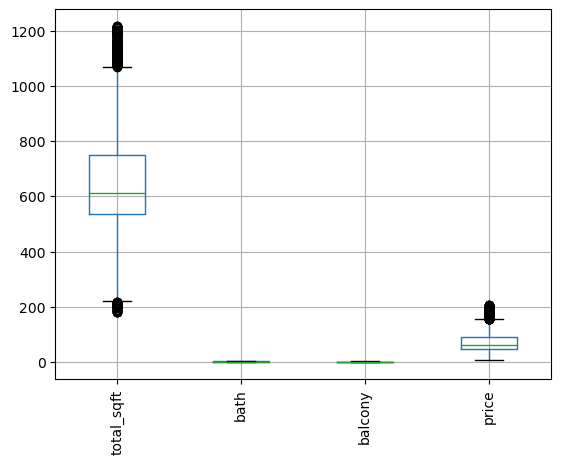

In [135]:
df2.boxplot()
plt.xticks(rotation=90)
plt.show()

In [218]:
df2.shape

(11008, 12)

After removing the outliers the skeness decreases along with less number of outliers 

# * FEATURE ENGINEERING

### adding new column called pricepersqft

In [136]:
df2['pricepersqft']=df2['price']/df2['total_sqft']

### adding new column called bathroom, balcony interaction ( zero exists so cannt take ratio)

In [138]:
df2['bat-bal']=df2['balcony']*df2['bath']

### log transformation on the pricepersqft variable 

In [139]:
df2['log_pricepersqft'] = np.log1p(df2['pricepersqft'])

# MODELLING  -- LINEAR REGRESSION MODEL

In [145]:
# IMPORT THE LIBRARIES 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer,StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV ,RandomizedSearchCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


In [142]:
# get dummies of the processed data with one hot encoding
df5=pd.get_dummies(df2, drop_first=True)

In [143]:
df5

,total_sqft,bath,balcony,price,pricepersqft,bat-bal,log_pricepersqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,society_PrarePa,society_Prtanha,society_Prtates,society_Sryalan,BHK_2,BHK_3,BHK_4,BHK_5 or 6,BHK_7 to 10,dates_upcoming
0,528.0,2.0,1.0,39.07,0.073996,2.0,0.071386,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,720.0,2.0,3.0,62.00,0.086111,6.0,0.082604,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,760.5,3.0,1.0,95.00,0.124918,3.0,0.117710,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,600.0,2.0,1.0,51.00,0.085000,2.0,0.081580,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,585.0,2.0,1.0,38.00,0.064957,2.0,0.062935,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,631.0,2.0,2.0,47.00,0.074485,4.0,0.071841,0,0,1,...,0,0,0,0,1,0,0,0,0,0
13313,672.5,2.0,1.0,57.00,0.084758,2.0,0.081357,0,0,1,...,0,0,0,0,0,1,0,0,0,0
13314,857.5,3.0,3.0,112.00,0.130612,9.0,0.122759,0,0,1,...,0,0,0,0,0,1,0,0,0,0
13317,570.5,2.0,1.0,60.00,0.105171,2.0,0.100000,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# 1.LINEAR REGRESSION

In [146]:
# call linear regression as lr
lr=LinearRegression()

In [147]:
# define independent and dependent variables 
x=df5.drop('price', axis=1)
y=df5["price"]


# split the data into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

In [149]:
# checking the shape of the data
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((8256, 40), (2752, 40), (8256,), (2752,))

In [150]:
#fitting the model 
lr_model = lr.fit(xtrain,ytrain)

# getting the predicted values for train and test 
ypred_train_lr = lr_model.predict(xtrain)
ypred_test_lr = lr_model.predict(xtest)

# finding rmse train and test 
print("RMSE Train lr:",mean_squared_error(ytrain,ypred_train_lr,squared=False))
print("RMSE Test lr:",mean_squared_error(ytest,ypred_test_lr,squared=False))


# finding r2 score train and test
r2_train_lr=r2_score(ytrain,ypred_train_lr)
r2_test_lr=r2_score(ytest,ypred_test_lr)
print("R2 Train :", r2_train_lr)
print("R2 Test:" ,r2_test_lr)

RMSE Train lr: 8.437590468768228
RMSE Test lr: 8.02608605851116
R2 Train : 0.9482161241549297
R2 Test: 0.9527395913086019


In [151]:
# appending the scores to a dataframe called  D for the final analysis 
D=pd.DataFrame()
D['SCORE']=['rmse train', 'rmse test', 'r2 train','r2 test']
D['LINEAR REGRESSION']=[mean_squared_error(ytrain,ypred_train_lr,squared=False),mean_squared_error(ytest,ypred_test_lr,squared=False),
                       r2_train_lr,r2_test_lr]

# 2.RIDGE 

In [154]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()


ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 1e-15} 



In [155]:
# use Ridge() to perform ridge regression

ridge_model = Ridge(alpha = 1e-15, max_iter = 500)

# fit the model on train set
ridge_model.fit(xtrain, ytrain)


Ridge(alpha=1e-15, max_iter=500)

In [156]:
# get predicted values

ypred_train_ridge = ridge_model.predict(xtrain)
ypred_test_ridge = ridge_model.predict(xtest)


In [157]:
print("RMSE Train lr_ridge:",mean_squared_error(ytrain,ypred_train_ridge,squared=False))
print("RMSE Test lr_ridge:",mean_squared_error(ytest,ypred_test_ridge,squared=False))



r2_train_ridge=r2_score(ytrain,ypred_train_ridge)
r2_test_ridge=r2_score(ytest,ypred_test_ridge)

print("R2 Train ridge2:", r2_train_ridge)
print("R2 Test ridge2:" ,r2_test_ridge)


RMSE Train lr_ridge: 8.437590468768224
RMSE Test lr_ridge: 8.02608605851112
R2 Train ridge2: 0.9482161241549297
R2 Test ridge2: 0.9527395913086023


In [168]:

D['ridge']=[mean_squared_error(ytrain,ypred_train_ridge,squared=False),
                                   mean_squared_error(ytest,ypred_test_ridge,squared=False),
                        r2_train_ridge,r2_test_ridge]

,SCORE,LINEAR REGRESSION,ridge
0,rmse train,8.437590,8.437590
1,rmse test,8.026086,8.026086
2,r2 train,0.948216,0.948216
3,r2 test,0.952740,0.952740


## 3. LASSO

In [160]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the LASSO regression model
lasso = Lasso()


lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for Ridge Regression: ', lasso_grid.best_params_, '\n')


Best parameters for Ridge Regression:  {'alpha': 1e-15} 



In [161]:
lasso_model = Lasso(alpha = 1e-15, max_iter = 500)

In [162]:
# fit the model 
lasso_model.fit(xtrain, ytrain)

Lasso(alpha=1e-15, max_iter=500)

In [163]:
# get the predicted values
ypred_train_LASSO = lasso_model.predict(xtrain)
ypred_test_LASSO = lasso_model.predict(xtest)

In [164]:
# get rmse and r2 score 
print("RMSE Train lasso:",mean_squared_error(ytrain,ypred_train_LASSO ,squared=False))
print("RMSE Test lasso:",mean_squared_error(ytest,ypred_test_LASSO ,squared=False))
r2_train_lasso=r2_score(ytrain,ypred_train_LASSO)
r2_test_lasso=r2_score(ytest,ypred_test_LASSO)
print("R2 Train :", r2_train_lasso)
print("R2 Test:" ,r2_test_lasso)

RMSE Train lasso: 8.62758859070492
RMSE Test lasso: 8.10024875365991
R2 Train : 0.9458577222030639
R2 Test: 0.951862164246133


In [175]:

D[' lasso']=[mean_squared_error(ytrain,ypred_train_LASSO ,squared=False),
                                   mean_squared_error(ytest,ypred_test_LASSO ,squared=False),
                        r2_train_lasso,r2_test_lasso]

# 4. ELASTIC NET 

In [177]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')



Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 



In [178]:
elasticnet_model = ElasticNet(alpha = 0.0001, l1_ratio=0.2, max_iter = 500)

In [179]:
# fit the model 
elasticnet_model .fit(xtrain, ytrain)

ElasticNet(alpha=0.0001, l1_ratio=0.2, max_iter=500)

In [181]:
# get the predicted values 
ypred_train_ENET = elasticnet_model.predict(xtrain)
ypred_test_ENET = elasticnet_model.predict(xtest)

In [182]:
# get the scores
print("RMSE Train lr enet:",mean_squared_error(ytrain,ypred_train_ENET ,squared=False))
print("RMSE Test lr enet:",mean_squared_error(ytest,ypred_test_ENET,squared=False))
r2_train_enet=r2_score(ytrain,ypred_train_ENET)
r2_test_enet=r2_score(ytest,ypred_test_ENET)
print("R2 Train _enet:", r2_train_enet)
print("R2 Test enet:" ,r2_test_enet)

RMSE Train lr enet: 9.32709899392942
RMSE Test lr enet: 8.67233608323727
R2 Train _enet: 0.9367222773896424
R2 Test enet: 0.944822496285986


In [184]:

D[' enet']=[mean_squared_error(ytrain,ypred_train_ENET ,squared=False),
                                   mean_squared_error(ytest,ypred_test_ENET,squared=False),
                       r2_train_enet,r2_test_enet]

# FEATURE SELECTION AND REBUILDING THE MODEL 

# forward feature selection

In [185]:
lr= LinearRegression()

lr_forward = sfs(estimator=lr, k_features ='best', forward=True,
                     verbose=2, scoring='r2')


sfs_forward = lr_forward.fit(xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished

[2023-10-24 10:48:09] Features: 1/40 -- score: 0.5482736501527591[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.2s finished

[2023-10-24 10:48:09] Features: 2/40 -- score: 0.9361328507441152[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.2s finished

[2023-10-24 10:48:10] Features: 3/40 -- score: 0.9456096466118197[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s finished

[2023-10-24 10:48:20] Features: 28/40 -- score: 0.9477080049534795[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2023-10-24 10:48:21] Features: 29/40 -- score: 0.9477134672950228[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s finished

[2023-10-24 10:48:21] Features: 30/40 -- score: 0.9477127863431181[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2023-10-24 10:48:22] Features: 31/

In [186]:
sfs_forward.k_feature_names_

('total_sqft',
 'pricepersqft',
 'log_pricepersqft',
 'area_type_Plot  Area',
 'location_Bannerghatta Road',
 'location_Electronic City',
 'location_Haralur Road',
 'location_Hebbal',
 'location_Hennur Road',
 'location_Kanakpura Road',
 'location_Marathahalli',
 'location_Other',
 'location_Raja Rajeshwari Nagar',
 'location_Sarjapur  Road',
 'location_Thanisandra',
 'location_Uttarahalli',
 'location_Whitefield',
 'location_Yelahanka',
 'society_GMown E',
 'society_No',
 'society_Other',
 'society_PrarePa',
 'society_Prtanha',
 'society_Prtates',
 'society_Sryalan',
 'BHK_2',
 'BHK_3',
 'BHK_4',
 'BHK_5 or 6 ')

### rebuilding the model using sfs forward features

In [187]:
x=df5.loc[:,sfs_forward.k_feature_names_]

In [188]:
y=df5['price']

In [189]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

In [190]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((8256, 29), (2752, 29), (8256,), (2752,))

In [191]:
lr_model_sfs = lr.fit(xtrain,ytrain)
ypred_train_lr_sfs = lr_model_sfs.predict(xtrain)
ypred_test_lr_sfs = lr_model_sfs.predict(xtest)
print("RMSE Train lr sfs:",mean_squared_error(ytrain,ypred_train_lr_sfs,squared=False))
print("RMSE Test lr sfs:",mean_squared_error(ytest,ypred_test_lr_sfs,squared=False))


r2_train_lr_sfs=r2_score(ytrain,ypred_train_lr_sfs)
r2_test_lr_sfs=r2_score(ytest,ypred_test_lr_sfs)
print("R2 Train_sfs :", r2_train_lr_sfs)
print("R2 Test_sfs:" ,r2_test_lr_sfs)

RMSE Train lr sfs: 8.44537240994446
RMSE Test lr sfs: 8.042824541523775
R2 Train_sfs : 0.9481205601642767
R2 Test_sfs: 0.9525422616433249


In [192]:
D['SFS_FW']=[mean_squared_error(ytrain,ypred_train_lr_sfs,squared=False),
                                   mean_squared_error(ytest,ypred_test_lr_sfs,squared=False),
                       r2_train_lr_sfs,r2_test_lr_sfs]

# sfs backward 

In [196]:
lr= LinearRegression()

lr_backward = sfs(estimator=lr, k_features ='best', forward=False,
                     verbose=2, scoring='r2')


sfs_backward = lr_backward.fit(xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.8s finished

[2023-10-24 10:50:39] Features: 28/1 -- score: 0.9477311934431212[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.8s finished

[2023-10-24 10:50:40] Features: 27/1 -- score: 0.9477309012769343[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.7s finished

[2023-10-24 10:50:41] Features: 26/1 -- score: 0.947727328137286[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [197]:
sfs_backward.k_feature_names_ 

('total_sqft',
 'pricepersqft',
 'log_pricepersqft',
 'area_type_Plot  Area',
 'location_Bannerghatta Road',
 'location_Electronic City',
 'location_Haralur Road',
 'location_Hennur Road',
 'location_Kanakpura Road',
 'location_Marathahalli',
 'location_Other',
 'location_Raja Rajeshwari Nagar',
 'location_Sarjapur  Road',
 'location_Thanisandra',
 'location_Uttarahalli',
 'location_Whitefield',
 'location_Yelahanka',
 'society_GMown E',
 'society_No',
 'society_Other',
 'society_PrarePa',
 'society_Prtanha',
 'society_Prtates',
 'society_Sryalan',
 'BHK_2',
 'BHK_3',
 'BHK_4',
 'BHK_5 or 6 ')

In [198]:
x=df5.loc[:,sfs_backward.k_feature_names_]
y=df5['price']

In [199]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

In [200]:
lr_model_sfs_bc = lr.fit(xtrain,ytrain)
ypred_train_lr_sfs_bc = lr_model_sfs_bc.predict(xtrain)
ypred_test_lr_sfs_bc= lr_model_sfs_bc.predict(xtest)
print("RMSE Train lr_sfs_bc:",mean_squared_error(ytrain,ypred_train_lr_sfs_bc,squared=False))
print("RMSE Test lr_sfs_bc:",mean_squared_error(ytest,ypred_test_lr_sfs_bc,squared=False))

r2_train_lr_sfs_bc=r2_score(ytrain,ypred_train_lr_sfs_bc)
r2_test_lr_sfs_bc=r2_score(ytest,ypred_test_lr_sfs_bc)
print("R2 Train_sfs_bc:", r2_train_lr_sfs_bc)
print("R2 Test_sfs_bc:" ,r2_test_lr_sfs_bc)

RMSE Train lr_sfs_bc: 8.445384384289964
RMSE Test lr_sfs_bc: 8.042942588329874
R2 Train_sfs_bc: 0.9481204130487328
R2 Test_sfs_bc: 0.9525408685318573


In [201]:
D['SFS_BW']=[mean_squared_error(ytrain,ypred_train_lr_sfs_bc,squared=False),
                                   mean_squared_error(ytest,ypred_test_lr_sfs_bc,squared=False),
                       r2_train_lr_sfs_bc,r2_test_lr_sfs_bc]

## cross validation 

In [203]:
from sklearn.model_selection import cross_val_score, KFold

In [206]:
lr=LinearRegression()
kf=KFold(n_splits=5, shuffle=True, random_state=1)
cros_cal_score=cross_val_score(lr, x, y , cv = kf, scoring='r2')
rmse=np.sqrt(np.mean(np.abs(cros_cal_score)))
print('bias error', rmse)
std=np.std(np.abs(cros_cal_score), ddof=1)
print('variance error', std)

bias error 0.9741497618986762
variance error 0.0023522627002365297


# summary of all linear models 

In [207]:
# get the dataframe with all score summary 
D

,SCORE,LINEAR REGRESSION,ridge,lasso,enet,SFS_FW,SFS_BW
0,rmse train,8.437590,8.437590,8.627589,9.327099,8.445372,8.445384
1,rmse test,8.026086,8.026086,8.100249,8.672336,8.042825,8.042943
2,r2 train,0.948216,0.948216,0.945858,0.936722,0.948121,0.948120
3,r2 test,0.952740,0.952740,0.951862,0.944822,0.952542,0.952541


from the summary it seems that linear regression and ridge both has the same values of scores in all 4. so iam optiong the first one. linear regression base model. 
     it has low rmse test and high r2 test. 

# *Plotting the output of LINEAR REGRESSION MODEL 

In [208]:
# GETTING ACTUAL VS PREDICTED 
pd.DataFrame({'ACTUAL':ytest, 'PREDICTED': ypred_test_lr})

,ACTUAL,PREDICTED
5596,42.00,41.496328
11570,46.00,44.476006
9931,175.00,161.116632
4523,160.00,142.615001
584,180.00,154.706710
...,...,...
10746,55.00,56.403619
12065,32.25,25.652481
6612,37.00,31.875148
3517,58.00,60.543719


## residual  vs actual plot 

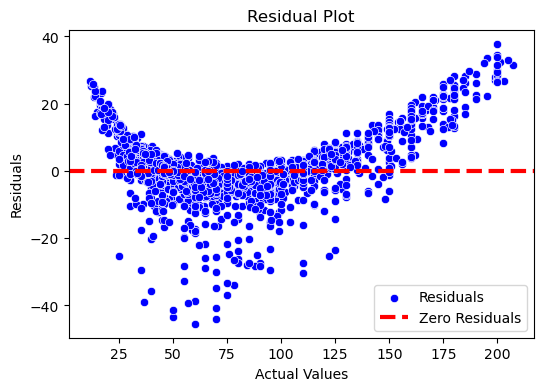

In [223]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=ytest, y=(ytest - ypred_test_lr), color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=3, label='Zero Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


## Distribution of residuals 

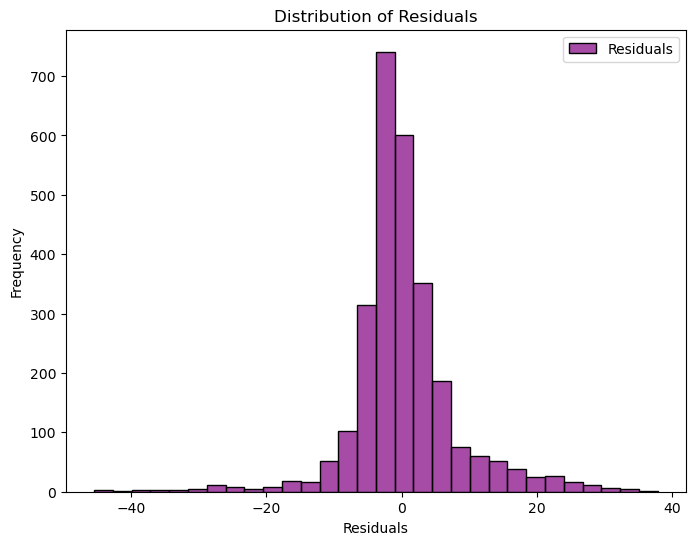

In [228]:
plt.figure(figsize=(8, 6))
sns.histplot(ytest - ypred_test_lr, bins=30, color='purple', alpha=0.7, label='Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend()
plt.show()

## Actual vs predicted

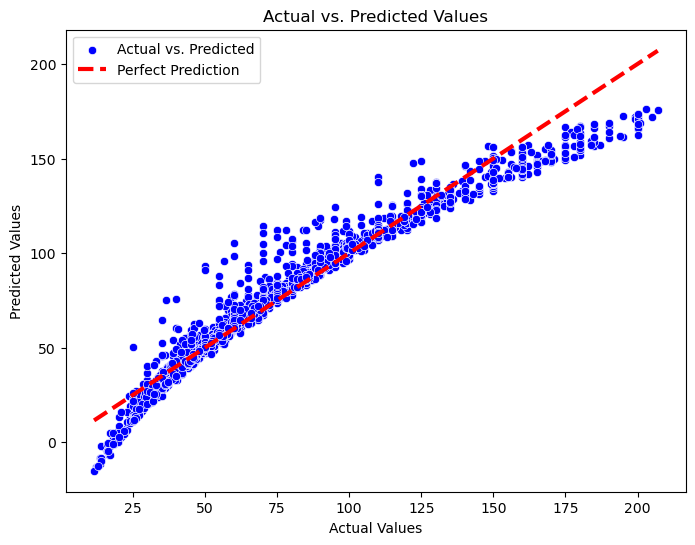

In [231]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ytest,
            y=ypred_test_lr, color='blue', label='Actual vs. Predicted')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], linestyle='--', color='red', linewidth=3, 
         label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

The graph shows that the accuarcy in prediction is high, or the model performs better in the mmiddle while it performs poor in the side values. 

# CONCLUSION 

The prices of houses in Bengaluru varies from location to location and are highly influenced by the area type, availability dates,society and mainly the presence of balcony. 

The given dataset had extreme outliers which were dropped during data preprocessing. 

In this project i used linear regression along with regularization techniques and feature selection methods to build the models. 

The all models build produced an r2 score above 9 on train and test data, which shows the feature engineering and data cleaning are done properly. And among the models, i choosed the base model of linear regression with all variables, which has the highest r2 score on the test data and lowest rmse on the test data which depicts that this model can predict the house price more accurately. 

###### thank you 